In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "Scripts")))

from config import Config
from models import AutoEncoder
from utils import load_model
from dataset import get_dataloaders

import numpy as np
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
config = Config()

In [3]:
transform = transforms.Compose([
        transforms.Resize((config.image_size, config.image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

In [4]:
train_loader, val_loader, test_loader = get_dataloaders(
        config.data_dir,
        config.image_size,
        config.batch_size,
        config.num_workers
    )

In [5]:
model = AutoEncoder(config.latent_dim, config.image_size).to(config.device)
model.encoder.load_state_dict(torch.load(config.Encoder_path))
model.decoder.load_state_dict(torch.load(config.Decoder_path))

<All keys matched successfully>

In [ ]:
ins = []
outs = []
lats = []
for c, (images, _ )in enumerate(val_loader):
    print(f"\r{c+1}/{len(val_loader)}", end=" ", flush=True)
    images = images.to(config.device)
    out, lat = model(images)
    ins.append(images.detach().cpu())
    outs.append(out.detach().cpu())
    lats.append(lat.detach().cpu())

latents = torch.concat(lats,axis = 0)

360/361 

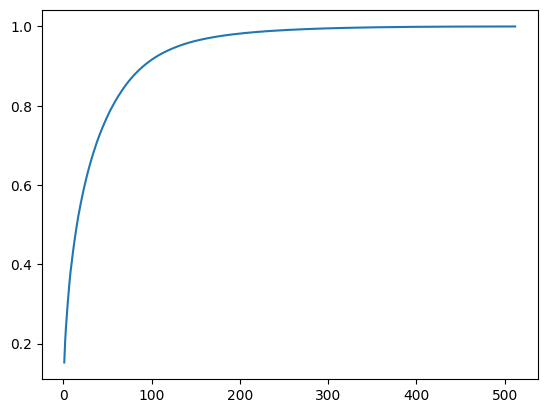

In [7]:
pca = PCA(n_components=512)
pca.fit(latents.numpy())

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, 513), explained_variance_ratio)
plt.show()